In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from datetime import datetime
import time,re
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import matplotlib.pyplot as plt
%matplotlib inline

# 读入晴天数据集

In [2]:
qt = pd.read_table('qingtian.txt')
qt.shape

(19917, 18)

## 去掉无关字段

In [3]:
qt.drop('用户ID',axis = 1,inplace = True)

## 在指定位置增加歌曲名字段

In [4]:
qt.insert(0,column = '歌曲名',value = '晴天')

In [5]:
qt.shape

(19917, 18)

## 字段顺序调整

In [6]:
new_columns = ('歌曲名', '用户昵称', '评论时间', '点赞总数', '评论内容', 'polarity', 'magnitude', '乐观',
       '愉快', '兴奋', '喜爱', '害羞', '悲伤', '愤怒', '恐惧', '厌恶', '惊讶', '焦虑')
qt = qt.reindex_axis(new_columns,axis = 1)
qt.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论内容,polarity,magnitude,乐观,愉快,兴奋,喜爱,害羞,悲伤,愤怒,恐惧,厌恶,惊讶,焦虑
0,晴天,笙笙不熄,1.490684e+12,0.0,1111,46.110,0.202,0.0,0.178,0.178,0.186,0.0,0.0,0.288,0.17,0.0,0.0,0.0
1,晴天,乔先森1995,1.490683e+12,0.0,苏州园区的路过，哈哈哈,59.526,0.339,0.0,0.217,0.196,0.287,0.0,0.0,0.000,0.00,0.0,0.3,0.0


## 评论时间处理

In [7]:
qt['评论时间'] = pd.to_datetime(qt['评论时间'], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')

In [8]:
qt.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论内容,polarity,magnitude,乐观,愉快,兴奋,喜爱,害羞,悲伤,愤怒,恐惧,厌恶,惊讶,焦虑
0,晴天,笙笙不熄,2017-03-28 06:47:28,0.0,1111,46.110,0.202,0.0,0.178,0.178,0.186,0.0,0.0,0.288,0.17,0.0,0.0,0.0
1,晴天,乔先森1995,2017-03-28 06:43:53,0.0,苏州园区的路过，哈哈哈,59.526,0.339,0.0,0.217,0.196,0.287,0.0,0.0,0.000,0.00,0.0,0.3,0.0


# 读入彩虹、蒲公英的约定数据集

In [9]:
ch = pd.read_table('jay_zhou-result.txt')
ch.shape

(27297, 18)

In [10]:
ch = ch.reindex_axis(new_columns,axis = 1)

In [11]:
ch.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论内容,polarity,magnitude,乐观,愉快,兴奋,喜爱,害羞,悲伤,愤怒,恐惧,厌恶,惊讶,焦虑
0,彩虹,cp33,2014-11-10,51822,高一那年，暗恋一个女孩，她说她最爱听彩虹，我就反复练习，终于等到一个机会，在电话里唱给她听，...,69.786,0.209,0.142363,0.154925,0.135385,0.265187,0.0,0.0,0.149257,0.042300,0.0,0.053479,0.057407
1,彩虹,啵喵,2015-08-28,26484,把《彩虹》的歌词和蔡依林的《倒带》对照着听倒带:你累积给的伤害我是真的很难释怀彩虹:释怀说了...,65.641,0.364,0.200205,0.127344,0.117497,0.211364,0.0,0.0,0.242918,0.100672,0.0,0.000000,0.000000


# 数据集合成

In [12]:
df = pd.concat([qt,ch],ignore_index = True)
df.shape

(47214, 18)

In [13]:
df.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论内容,polarity,magnitude,乐观,愉快,兴奋,喜爱,害羞,悲伤,愤怒,恐惧,厌恶,惊讶,焦虑
0,晴天,笙笙不熄,2017-03-28 06:47:28,0.0,1111,46.110,0.202,0.0,0.178,0.178,0.186,0.0,0.0,0.288,0.17,0.0,0.0,0.0
1,晴天,乔先森1995,2017-03-28 06:43:53,0.0,苏州园区的路过，哈哈哈,59.526,0.339,0.0,0.217,0.196,0.287,0.0,0.0,0.000,0.00,0.0,0.3,0.0


In [14]:
df.columns

Index(['歌曲名', '用户昵称', '评论时间', '点赞总数', '评论内容', 'polarity', 'magnitude', '乐观',
       '愉快', '兴奋', '喜爱', '害羞', '悲伤', '愤怒', '恐惧', '厌恶', '惊讶', '焦虑'],
      dtype='object')

# 表情提取

In [15]:
df['emo'] = df['评论内容'].str.findall(r'\[(.*?)\]',re.I|re.M)
df['emo'] = df['emo'].str[0].replace(r'[\[\]]','\t')
df['emo'].map(lambda x:x.strip() if isinstance(x,str) else x).head(10)
df['emo'] = df['emo'].str.split('\t+')
df['emo'] = df['emo'].map(lambda x: ','.join(x) if isinstance(x, list) else '')
df['emo'].value_counts().head()

      43645
流泪      366
爱心      340
可爱      332
大哭      330
Name: emo, dtype: int64

# 增加评论长度字段

In [16]:
df.insert(4,column = '评论长度',value = df['评论内容'].str.len())

# discussion result

## 一天24小时评论数的变化

![](when.png)

## 评论中提及的城市分布

In [17]:
citylist = ['苏州','北京','上海','天津','成都',
            '南京','广州','杭州','芜湖','长春',
            '黄山','烟台','无锡','榆林','新余',
            '晋江','湘潭','襄阳','江门','绵阳',
            '婺源','荆州','哈尔滨','庐州','柳州',
            '金华','秦皇岛','南阳','益阳','渭南',
            '淄博','绍兴','广安','贵阳','常州',
            '上饶','泰安','池州','绵阳','九江',
            '呼和浩特','佛山','莆田','南昌','遵义',
            '马鞍山','衡阳','东莞','淮南','玉林',
            '咸阳','淮安','雅安','长沙','德州',
            '深圳','福州','武汉','沈阳','泉州',
            '厦门','杭州','郑州','西安','南宁',
            '嘉兴','兰州','珠海','潍坊','商丘',
            '合肥','重庆','昆明','连云港','宜兴',
            '温州','济南','宁波']

In [18]:
df['城市'] = df['评论内容'].str.findall(r'|'.join(citylist),re.I|re.M)
df['城市'] = df['城市'].str[0].replace(r'[\[\]]','\t+')

In [33]:
city = pd.DataFrame(df['城市'].value_counts())
city.head()

,城市
南京,107
武汉,96
重庆,90
西安,79
成都,78


## 点赞数与评论长度

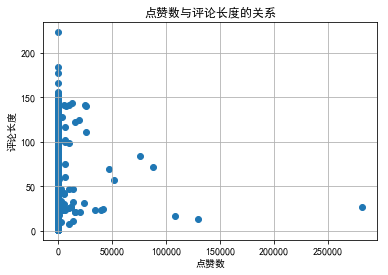

In [20]:
df.sort_values(by = '点赞总数',ascending = False)
x = df['点赞总数']
y = df['评论长度']
plt.scatter(x,y)
plt.title('点赞数与评论长度的关系')
plt.xlabel('点赞数')
plt.ylabel('评论长度')
plt.grid()

In [21]:
df['评论长度'].mean()

23.20269840933641

In [22]:
length = pd.DataFrame(df['评论长度'].value_counts())
length.head()

,评论长度
4.0,2739
7.0,2177
8.0,1998
12.0,1993
11.0,1956


In [34]:
a = df[['评论长度','点赞总数']].copy()
a.head(5)

,评论长度,点赞总数
0,4.0,0.0
1,11.0,0.0
2,21.0,0.0
3,11.0,0.0
4,29.0,0.0


In [35]:
a['COUNT'] = 1
a.head()

,评论长度,点赞总数,COUNT
0,4.0,0.0,1
1,11.0,0.0,1
2,21.0,0.0,1
3,11.0,0.0,1
4,29.0,0.0,1


In [36]:
a.groupby('评论长度').agg({'COUNT':'sum','点赞总数':'sum'}).reset_index().head()

,评论长度,COUNT,点赞总数
0,1.0,347,650.0
1,2.0,1859,2951.0
2,3.0,1484,2219.0
3,4.0,2739,5378.0
4,5.0,1848,2986.0


In [26]:
df.loc[df['评论长度']<=50,'评论类别']='短评'
df.loc[(df['评论长度']>50) & (df['评论长度']<=100),'评论类别']= '中评'
df.loc[(df['评论长度']>100) & (df['评论长度']<=150),'评论类别']= '较长评'
df.loc[df['评论长度']>150,'评论类别']= '长评'
pd.DataFrame(df['评论类别'].value_counts())

,评论类别
短评,41924
中评,3546
较长评,1733
长评,10


In [48]:
zan = df[df['点赞总数']>=10]
pd.DataFrame(zan['评论类别'].value_counts())

,评论类别
短评,567
中评,133
较长评,121
长评,1


In [28]:
len(zan)

822

In [49]:
zero = df[df['点赞总数']>0]
pd.DataFrame(zero['评论类别'].value_counts())

,评论类别
短评,29841
中评,3024
较长评,1560
长评,10


## 点赞数与polarity

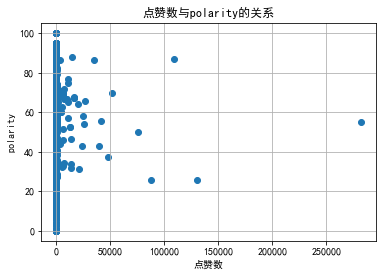

In [30]:
df.sort_values(by = '点赞总数',ascending = False)
x = df['点赞总数']
y = df['polarity']
plt.scatter(x,y)
plt.title('点赞数与polarity的关系')
plt.xlabel('点赞数')
plt.ylabel('polarity')
plt.grid()

In [39]:
df.loc[df['polarity']>=60,'情绪高低'] = '较高情绪值'
df.loc[(df['polarity']>=40) & (df['polarity']< 60),'情绪高低'] = '一般情绪值'
df.loc[(df['polarity']>=25) & (df['polarity']< 40),'情绪高低'] = '较低情绪值'
df.loc[df['polarity']<25,'情绪高低'] = '极低情绪值'
df['情绪高低'].value_counts()

较高情绪值    22971
一般情绪值    12634
较低情绪值     7983
极低情绪值     3626
Name: 情绪高低, dtype: int64

In [41]:
pd.DataFrame(zan['情绪高低'].value_counts())

,情绪高低
较高情绪值,379
一般情绪值,255
较低情绪值,128
极低情绪值,60


In [44]:
pd.DataFrame(zero['情绪高低'].value_counts())

,情绪高低
较高情绪值,16419
一般情绪值,9372
较低情绪值,5603
极低情绪值,3041


## 点赞数与magnitude

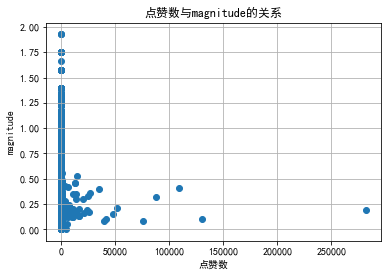

In [46]:
x = df['点赞总数']
y = df['magnitude']
plt.scatter(x,y)
plt.title('点赞数与magnitude的关系')
plt.xlabel('点赞数')
plt.ylabel('magnitude')
plt.grid()

In [47]:
df.loc[df['magnitude']>=1.5,'情绪浓度'] = '极浓'
df.loc[(df['magnitude']>=1) & (df['magnitude']< 1.5),'情绪浓度'] = '非常浓'
df.loc[(df['magnitude']>=0.5) & (df['magnitude']< 1),'情绪浓度'] = '较浓'
df.loc[df['magnitude']<0.5,'情绪浓度'] = '一般'
df['情绪浓度'].value_counts()

一般     40822
较浓      5975
非常浓      381
极浓        36
Name: 情绪浓度, dtype: int64

In [50]:
pd.DataFrame(zan['情绪浓度'].value_counts())

,情绪浓度
一般,773
较浓,46
非常浓,3


In [51]:
pd.DataFrame(zero['情绪浓度'].value_counts())

,情绪浓度
一般,29935
较浓,4217
非常浓,259
极浓,24


## 每首歌

### 晴天

In [52]:
qt_upvote = zan[zan['歌曲名']=='晴天']
qt_upvote = zan.sort_values(by = '点赞总数',ascending = False)
pd.set_option('max_colwidth', 400)
qt_upvote.head()

,歌曲名,用户昵称,评论时间,点赞总数,评论长度,评论内容,polarity,magnitude,乐观,愉快,...,愤怒,恐惧,厌恶,惊讶,焦虑,emo,城市,评论类别,情绪高低,情绪浓度
19275,晴天,蛋蛋是圆D,2014-10-17 07:22:54,281778.0,26.0,高一听的，那时候遇到了孩儿他妈，然后就这么幸福下来了,54.900,0.188,0.497,0.503,...,0.000,0.0,0.000,0.0,0.0,,NaN,短评,一般情绪值,一般
19061,晴天,荒灰黄,2014-11-04 09:19:19,129736.0,13.0,老子要听一辈子周杰伦！！！,25.758,0.100,0.000,0.000,...,0.376,0.0,0.321,0.0,0.0,,NaN,短评,较低情绪值,一般
18477,晴天,长在地上的姑娘,2014-12-03 02:56:29,108579.0,16.0,周杰伦 你要对那么多人的青春负责,86.940,0.413,0.000,0.000,...,0.000,0.0,0.000,0.0,0.0,,NaN,短评,较高情绪值,一般
16953,晴天,緑茶婊,2015-02-08 23:08:21,87734.0,71.0,初中听周杰伦被同学嘲笑：唱的什么鬼…长那么丑…词都唱不清…他们哪知道若干年后会听着他的歌流泪一整晚，原来我们输给了时光，败给了唇红齿白的自己😭,25.591,0.323,0.000,0.000,...,0.276,0.0,0.244,0.0,0.0,,NaN,中评,较低情绪值,一般
19074,晴天,哥特式的永恒,2014-11-03 15:39:12,75640.0,84.0,有没有85前听杰伦的来这？我84，2000年开始听刚上高一，现在都是俩孩的爹了，再听谢谢老歌好像回到了那时候的晚自习，在操场一起牵手的那个没成了孩他娘，但也没什么遗憾～,49.744,0.080,0.000,0.252,...,0.415,0.0,0.000,0.0,0.0,,NaN,中评,一般情绪值,一般


### 彩虹

In [55]:
ch_upvote = zan[zan['歌曲名']=='彩虹']
ch_upvote = ch_upvote.sort_values(by = '点赞总数',ascending = False)
pd.set_option('max_colwidth', 400)
ch_upvote.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论长度,评论内容,polarity,magnitude,乐观,愉快,...,愤怒,恐惧,厌恶,惊讶,焦虑,emo,城市,评论类别,情绪高低,情绪浓度
19917,彩虹,cp33,2014-11-10,51822.0,57.0,高一那年，暗恋一个女孩，她说她最爱听彩虹，我就反复练习，终于等到一个机会，在电话里唱给她听，于是就答应和我在一起了,69.786,0.209,0.142363,0.154925,...,0.149257,0.042300,0.0,0.053479,0.057407,,NaN,中评,较高情绪值,一般
19918,彩虹,啵喵,2015-08-28,26484.0,111.0,把《彩虹》的歌词和蔡依林的《倒带》对照着听倒带:你累积给的伤害我是真的很难释怀彩虹:释怀说了太多就成真不了倒带:宁愿没出息求我别离开彩虹:你要离开我知道很简单倒带:我想依赖彩虹:你说依赖倒带:我们面前太多阻碍彩虹:是我们的,65.641,0.364,0.200205,0.127344,...,0.242918,0.100672,0.0,0.000000,0.000000,,NaN,较长评,较高情绪值,一般


### 蒲公英的约定

In [56]:
pu_upvote = zan[zan['歌曲名']=='蒲公英的约定']
pu_upvote = pu_upvote.sort_values(by = '点赞总数',ascending = False)
pd.set_option('max_colwidth', 400)
pu_upvote.head(2)

,歌曲名,用户昵称,评论时间,点赞总数,评论长度,评论内容,polarity,magnitude,乐观,愉快,...,愤怒,恐惧,厌恶,惊讶,焦虑,emo,城市,评论类别,情绪高低,情绪浓度
29558,蒲公英的约定,灬死亡之翼灬,2014-11-07,39586.0,23.0,因为这首歌 从小到大我只喝优乐美 从不喝香飘飘,42.967,0.082,0.000000,0.095816,...,0.177373,0.0000,0.136879,0.097526,0.0,,NaN,短评,一般情绪值,一般
29559,蒲公英的约定,Pathoshepherd,2014-10-30,20933.0,21.0,这首歌的最后一句歌词或许是永恒不变的问题吧,31.013,0.159,0.099552,0.053032,...,0.338036,0.1566,0.000000,0.000000,0.0,,NaN,短评,较低情绪值,一般


### 提及词汇

#### 歌手

In [58]:
jay = zan[zan['评论内容'].str.contains('周杰伦|杰伦|jay|Jay')] 
jay[['评论内容','点赞总数']].head()

,评论内容,点赞总数
9047,我的微信昵称是晴天，我最喜欢的天气是晴天，我最爱的歌是晴天，我喜欢的歌手是周杰伦，我的愿望是在晴天的一百三十二万条评论里上热评，可以吗？,12.0
9848,为什么周杰伦现在的口碑一年比一年好，因为90后长大了，他的音乐不只是音乐啊，是我们的青春。,11.0
10420,评论明明都过万了，为什么还不能显示9999+？这怎能体现杰伦的屌阿,53.0
11207,周杰伦演唱会上说了一句：接下来，我就要勾起你们青春的回忆，来了哦~泪飚,23.0
11269,演唱会杰伦必唱曲目，有幸听过一场现场《晴天》5.16南京站，杰伦现场歌迷点歌，是一对情侣，杰伦很八卦，男歌迷说“我顶你哦”杰伦也在台上傻笑，因为他就是我们的州青春，然后杰伦说，那就带来一首晴天吧，顿时泪奔,11.0


In [59]:
jay['歌曲名'].value_counts()

晴天        101
蒲公英的约定     24
彩虹         23
Name: 歌曲名, dtype: int64

#### 旋律、节奏

In [61]:
intro = zan[zan['评论内容'].str.contains('前奏|旋律|节奏|歌曲')]
intro[['评论内容','点赞总数']].head()

,评论内容,点赞总数
10281,昨天济南站，前奏一出就泪崩了，再来感受下,88.0
11187,评论必须上万 ，这么点评论恶心谁呢，有多少歌你能让你喜欢十多年的？外国歌曲再好听，你不看翻译你知道啥意思？逼格高一会儿就行了，唱都不会唱，还感动，感动个篮子。,11.0
11725,今天离高考还有6天16个小时，心很乱情绪很烦，晴天的旋律在心里嚷嚷了一天，好吧，午睡醒我决定满足自己，认认真真跟着唱一遍。然后，认认真真开始进入备考状态。我高四了，祝我好运。,145.0
11850,是这首歌的前奏，激发了我学吉他的欲望，然后我说服我妈妈给我买了第一把琴，我自己看着刘传的书，每逢周末，我抱着吉他不放…现在已经开始教小朋友们弹吉他了…回想起来，那段时间充满了各种美好和感动。,26.0
12049,有人说前奏无敌我就不高兴了 分明是全部都好都无敌！,208.0


In [62]:
intro['歌曲名'].value_counts()

晴天        48
蒲公英的约定     5
彩虹         2
Name: 歌曲名, dtype: int64

#### 喜欢/爱情/初恋/暗恋/恋爱"(爱)

In [63]:
like = zan[zan['评论内容'].str.contains('喜欢|爱情|初恋|暗恋|恋爱|爱')]
like[['评论内容','点赞总数']].head(10)

,评论内容,点赞总数
3394,去年高考出成绩的那个凌晨，听了这首歌，突然哭了，一个冲动去和男神表白，我让他不要回我，因为没有这个答案的话我还能再继续喜欢他很久，后来他去了复旦，我选择了复读，离2017年高考还有73天，真的很想去复旦，告诉他喜欢了你三年的人和你一样优秀[流泪],11.0
3917,初二，借的我喜欢的姑凉的物理书，在最后一页，我偷偷的写上了晴天的歌词。,11.0
4046,昨天喜欢了三年的他获得了清华直降六十分的资格，怎么说呢，替他高兴但又暗自失落，好像距离他更远了。正在写人大自主招生的自荐，接下来的七十几天一定要加油，稳定发挥，圆梦人大。Hey，你要等我。,10.0
8626,今天是我的20岁生日，接下来的十年是人生中最重要的十年，我希望我能把它过好，在我最喜欢的歌下祝我自己一帆风顺吧,11.0
9047,我的微信昵称是晴天，我最喜欢的天气是晴天，我最爱的歌是晴天，我喜欢的歌手是周杰伦，我的愿望是在晴天的一百三十二万条评论里上热评，可以吗？,12.0
9508,2017-3-23 星期四 晴天 中国1：0韩国 请国人永远铭记这一天 装B的棒子国输给了我们大华夏[爱心],15.0
9686,这是我最喜欢的一首歌，也是我网易云收藏的第一首歌，同样也是网易云第一首破百万的歌，其实我最想说的是，谭羽伶，你回来吧，我们不分手好不好，我求你了，从校园到踏入社会1500多天，我们结婚吧，好不好,10.0
10106,本来最爱的是黑色幽默。因为一份爱 我现在最爱的是晴天。呐 谢谢你维护着当时的我的幻想。说了太多谢谢你。这次换句：我爱你。我只爱过你一人。,42.0
10285,云音乐的评论现在全是这样的高逼格用词：【记得高中那会就开始】 【又想起了我的大学时代】【那时候我的前女友也爱听】【小学到现在一直都在听】【从手机的播放列表里从来没删除过，还有mp3】 ......真希望以后能少看见点这样的词，我不排除你确实在表达心情，可我们的眼睛真看累了，咱能不能换个套路,61.0
11187,评论必须上万 ，这么点评论恶心谁呢，有多少歌你能让你喜欢十多年的？外国歌曲再好听，你不看翻译你知道啥意思？逼格高一会儿就行了，唱都不会唱，还感动，感动个篮子。,11.0


In [64]:
like['歌曲名'].value_counts()

晴天        147
蒲公英的约定     60
彩虹         36
Name: 歌曲名, dtype: int64

#### 青春/回忆/记忆/时代/过去/故事"(情节)

In [66]:
story = zan[zan['评论内容'].str.contains('青春|回忆|记忆|时代|过去|故事')]
story[['评论内容','点赞总数']].head()

,评论内容,点赞总数
4877,看了3个小时的评论 就像看了三万人的青春,11.0
4990,今天我生日，然后过去了八分钟没有收到祝福，我有点介意某只傻狍子😞晚安～,11.0
9848,为什么周杰伦现在的口碑一年比一年好，因为90后长大了，他的音乐不只是音乐啊，是我们的青春。,11.0
10285,云音乐的评论现在全是这样的高逼格用词：【记得高中那会就开始】 【又想起了我的大学时代】【那时候我的前女友也爱听】【小学到现在一直都在听】【从手机的播放列表里从来没删除过，还有mp3】 ......真希望以后能少看见点这样的词，我不排除你确实在表达心情，可我们的眼睛真看累了，咱能不能换个套路,61.0
11207,周杰伦演唱会上说了一句：接下来，我就要勾起你们青春的回忆，来了哦~泪飚,23.0


In [67]:
story['歌曲名'].value_counts()

晴天        125
蒲公英的约定     23
彩虹          9
Name: 歌曲名, dtype: int64

#### 翘课/校园/教室/作业/放学/秋千/花"(校园意象)

In [68]:
sth = zan[zan['评论内容'].str.contains('翘课|校园|教室|作业|放学|秋千|花')]
sth[['评论内容','点赞总数']].head()

,评论内容,点赞总数
9686,这是我最喜欢的一首歌，也是我网易云收藏的第一首歌，同样也是网易云第一首破百万的歌，其实我最想说的是，谭羽伶，你回来吧，我们不分手好不好，我求你了，从校园到踏入社会1500多天，我们结婚吧，好不好,10.0
11153,为你翘课，和你一起在谈心室罚站，可是一点也不觉得难过，反而很满足。一晃十二年了。我却做了你的伴郎。消失的下雨天，我好想再淋一遍,39.0
12068,后来在一次逛街中，妈妈答应给我买专辑，但只能买一张，当时我特别想买的专辑，一张是只认得这一首歌的周杰伦的《叶惠美》，一张是朴树的《生如夏花》，后来才知道这两个人的才华不分伯仲，我左手拿着《叶惠美》右手拿着《生如夏花》在音像店里犹豫了好长时间，最后我选择了《叶惠美》。,17.0
12311,虽然歌词没有林夕文山的那么妙笔生花，但周杰伦的歌词却能妙笔生情，为何？ 故事的小黄花 从出生那年就飘着 童年的荡秋千 随记忆一直晃到现在 他的想法早已种下很久，已经成为天王的周杰伦依然怀念校园的点滴，哪怕是当时二十多岁的他，依然孩子气，专一认真、念旧痴情、他才华横溢，他低调不羁。,10.0
12749,第一次听这首歌是小学6年级，现在大学都快毕业了，依然忘不了第一次听这首歌的那种难过劲儿。越长大越难过，每一次听都五味杂陈。然而再也回不到为你翘课准备礼物，为你翘课借酒消愁的日子，还有从此再也没有学生时代纯真的爱情了。以此纪念。最后，祝福所有6月毕业的大学狗们。,10.0


In [69]:
sth['歌曲名'].value_counts()

晴天        34
蒲公英的约定    14
彩虹         3
Name: 歌曲名, dtype: int64

#### 晴天/下雨/下雨天/天空/风/雨/晴"(天气)

In [71]:
wth = zan[zan['评论内容'].str.contains('晴天|彩虹|下雨|下雨天|天空|风|雨|晴|放晴')]
wth[['评论内容','点赞总数']].head()

,评论内容,点赞总数
1859,和女友是异地恋，生活在相距两千里的城市，我曾经认为她是我的动力，直到有一天我坐火车一口饭没吃来到她的城市，风里有她的味道，却是和一个陌生男人的身影。我走在冷风中吃着肉夹馍告诉自己，我只是跑了两千里来吃肉夹馍的，我没哭，只不过风太大，迷了眼。,10.0
3917,初二，借的我喜欢的姑凉的物理书，在最后一页，我偷偷的写上了晴天的歌词。,11.0
5303,有个逼说薛之谦的《高尚》将会超越我的周的《晴天》，我果断的顶了句妈卖批，你是不是在做梦啊！！！做梦都超越不了😊,10.0
8626,今天是我的20岁生日，接下来的十年是人生中最重要的十年，我希望我能把它过好，在我最喜欢的歌下祝我自己一帆风顺吧,11.0
9047,我的微信昵称是晴天，我最喜欢的天气是晴天，我最爱的歌是晴天，我喜欢的歌手是周杰伦，我的愿望是在晴天的一百三十二万条评论里上热评，可以吗？,12.0


In [72]:
wth['歌曲名'].value_counts()

晴天        137
彩虹         16
蒲公英的约定      7
Name: 歌曲名, dtype: int64

#### 拜拜/再见/离开/分别/离别/告别"(离别)

In [74]:
bye = zan[zan['评论内容'].str.contains('拜拜|再见|离开|分别|离别|告别')]
bye[['评论内容','点赞总数']].head()

,评论内容,点赞总数
17395,在从清迈去曼谷的深夜大巴上，和一个姑娘一人一个耳塞随机到了这首歌，不知道她现在好不好，只记得故事的最后我们说了拜拜。,10.0
18043,夏天的时候跟他一起跑去Jay的演唱会，第一次牵手拥抱亲吻，第二天车站告别，他回学校我出国再也没见过。这一年就这样过去。,10.0
18197,20年以后，我去看杰伦的告别演唱会，带着儿子一起，指着在台上依旧熟悉的人说，儿子你看，这是你爸追了40年的人，我还要再追20年，追到我们都老了，老的都哭了,16.0
18529,用一整首的歌词韵脚做铺垫，一直以为最后一句是，你还是说了再见，其实是你还是说了拜拜。写的不错,10.0
19079,刚刚在慢悠悠的火车上睡觉，穿得少，很冷。吃瓜子的大妈骤然拉开窗帘瞬间很暖和，我也有不那么讨厌晒的时候。到了冬天从睡眠到运气到状态都变得凝固而运作缓慢。马頔昨天也唱了晴天，算了，故事的最后还是说声拜拜。所有想做的事关乎离得更远和离得更近。,11.0


In [75]:
bye['歌曲名'].value_counts()

晴天        33
蒲公英的约定     6
彩虹         3
Name: 歌曲名, dtype: int64

#### 叶惠美|专辑|卡带|演唱会|音乐会|录音机|mp3

In [77]:
ye = zan[zan['评论内容'].str.contains('叶惠美|专辑|卡带|演唱会|音乐会|录音机|mp3')]
ye[['评论内容','点赞总数']].head()

,评论内容,点赞总数
10285,云音乐的评论现在全是这样的高逼格用词：【记得高中那会就开始】 【又想起了我的大学时代】【那时候我的前女友也爱听】【小学到现在一直都在听】【从手机的播放列表里从来没删除过，还有mp3】 ......真希望以后能少看见点这样的词，我不排除你确实在表达心情，可我们的眼睛真看累了，咱能不能换个套路,61.0
11207,周杰伦演唱会上说了一句：接下来，我就要勾起你们青春的回忆，来了哦~泪飚,23.0
11269,演唱会杰伦必唱曲目，有幸听过一场现场《晴天》5.16南京站，杰伦现场歌迷点歌，是一对情侣，杰伦很八卦，男歌迷说“我顶你哦”杰伦也在台上傻笑，因为他就是我们的州青春，然后杰伦说，那就带来一首晴天吧，顿时泪奔,11.0
12004,我是在杰伦的一次演唱会（第一次看演唱会，其实是来做兼职检票的。）听到的这首歌。当时听到这首歌的时候，突然有一种很美好的感觉，但是又带一点伤感，觉得以前的时候没有勇敢过，放肆过，加上全场几万人的互动，有种想回到初中彻底的冲动一把。。想象着牵着她的手，静静地在操场上走~~,10.0
12068,后来在一次逛街中，妈妈答应给我买专辑，但只能买一张，当时我特别想买的专辑，一张是只认得这一首歌的周杰伦的《叶惠美》，一张是朴树的《生如夏花》，后来才知道这两个人的才华不分伯仲，我左手拿着《叶惠美》右手拿着《生如夏花》在音像店里犹豫了好长时间，最后我选择了《叶惠美》。,17.0


In [78]:
ye['歌曲名'].value_counts()

晴天        32
蒲公英的约定     5
彩虹         4
Name: 歌曲名, dtype: int64